In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
%matplotlib inline

In [3]:
ndvi_data=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\ndvi_with_weather.csv")

In [4]:
ndvi_data

,Year,Month,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI
0,2000,1,0.000000,30.620000,19.251875,11.368750,14.910000,77.135625,100.341875,20.165625,0.790625,9.227500,0.64000,0.434257
1,2000,2,0.790625,33.623125,20.310000,13.315000,15.888125,73.709375,100.177500,21.145000,0.614375,8.026875,0.65750,0.464668
2,2000,3,0.000000,35.708125,20.649375,15.056250,15.571875,67.857500,100.088125,20.646875,0.306250,7.492500,0.67500,0.458238
3,2000,4,0.000000,39.083750,25.124375,13.960000,17.315625,65.190625,99.819375,22.387500,0.395625,8.481875,0.66000,0.409358
4,2000,5,0.593125,38.268125,25.467500,12.801250,17.368750,63.735000,99.809375,22.468750,0.366875,8.679375,0.67875,0.404442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019,8,4.875625,35.759375,24.339375,11.420000,17.291875,70.258125,99.875000,22.521875,1.165625,10.762500,0.65750,0.480994
236,2019,9,5.270000,34.608750,24.427500,10.181250,18.458125,78.644375,100.030000,23.681250,0.486875,8.537500,0.65875,0.529732
237,2019,10,6.853750,31.077500,24.018125,7.058750,18.680625,84.020625,100.178125,23.954375,0.328750,7.173125,0.67375,0.346350
238,2019,11,6.919375,30.738750,23.411875,7.326875,18.615625,84.815625,100.247500,23.889375,0.273750,8.215625,0.64625,0.605492


In [5]:
ndvi_data.describe()

,Year,Month,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2009.500000,6.500000,2.102164,34.172878,23.050451,11.122253,16.798589,72.703969,100.067091,21.999167,0.710495,8.941872,0.664344,0.483239
std,5.778332,3.459267,3.034818,2.833630,2.359561,1.653481,1.342643,6.745395,0.257699,1.350782,0.560303,1.327703,0.015285,0.074013
min,2000.000000,1.000000,0.000000,28.298125,18.288750,6.416875,13.056250,62.066250,99.630625,17.920625,0.103750,6.449375,0.622500,0.277496
25%,2004.750000,3.750000,0.000000,31.733594,20.672812,10.221094,15.749219,67.411875,99.825156,20.862187,0.326875,7.953594,0.656250,0.427694
50%,2009.500000,6.500000,0.395000,35.119062,23.829687,11.028750,17.081875,71.401250,100.029687,22.332187,0.509375,8.801250,0.661250,0.475400
75%,2014.250000,9.250000,3.573594,36.259219,25.027656,12.005781,17.810000,78.336406,100.277344,23.045625,0.926563,9.992188,0.673750,0.535074
max,2019.000000,12.000000,15.886875,39.083750,26.970625,15.988125,19.204375,87.710000,100.586875,24.271875,2.832500,13.458750,0.707500,0.657771


In [6]:
ndvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            240 non-null    int64  
 1   Month                           240 non-null    int64  
 2   Precipitation (mm)              240 non-null    float64
 3   Max Temperature (C)             240 non-null    float64
 4   Min Temperature (C)             240 non-null    float64
 5   Average Temperature (C)         240 non-null    float64
 6   Specific Humidity 2m (kg kg-1)  240 non-null    float64
 7   Relative Humidity 2m (%)        240 non-null    float64
 8   Surface Pressure (K Pa)         240 non-null    float64
 9   Dew Point (C)                   240 non-null    float64
 10  Min Wind Speed (m/s)            240 non-null    float64
 11  Max Wind Speed (m/s)            240 non-null    float64
 12  Cloud Coverage                  240 

In [7]:
ndvi_data['Year'] = ndvi_data['Year'].astype(np.float64)
ndvi_data['Month'] = ndvi_data['Month'].astype(np.float64)

In [8]:
ndvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            240 non-null    float64
 1   Month                           240 non-null    float64
 2   Precipitation (mm)              240 non-null    float64
 3   Max Temperature (C)             240 non-null    float64
 4   Min Temperature (C)             240 non-null    float64
 5   Average Temperature (C)         240 non-null    float64
 6   Specific Humidity 2m (kg kg-1)  240 non-null    float64
 7   Relative Humidity 2m (%)        240 non-null    float64
 8   Surface Pressure (K Pa)         240 non-null    float64
 9   Dew Point (C)                   240 non-null    float64
 10  Min Wind Speed (m/s)            240 non-null    float64
 11  Max Wind Speed (m/s)            240 non-null    float64
 12  Cloud Coverage                  240 

In [9]:
#Creating the correlation matrix for the features
corr_matrix=ndvi_data.corr()
corr_matrix

,Year,Month,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI
Year,1.000000e+00,5.586391e-15,0.011566,0.021389,0.072536,-0.066906,0.037550,-0.048131,0.071400,0.032791,-0.038083,-0.063085,-0.222413,0.098053
Month,5.586391e-15,1.000000e+00,0.589007,-0.309795,0.080440,-0.645736,0.464477,0.494699,-0.179622,0.502555,-0.071348,0.321766,-0.545010,0.468119
Precipitation (mm),1.156567e-02,5.890071e-01,1.000000,-0.366271,-0.049927,-0.556404,0.458911,0.666455,0.007619,0.484851,-0.221631,0.151506,-0.270437,0.418022
Max Temperature (C),2.138882e-02,-3.097951e-01,-0.366271,1.000000,0.812354,0.554510,0.359929,-0.852884,-0.702762,0.305239,-0.350438,0.110712,0.107781,-0.790392
Min Temperature (C),7.253556e-02,8.043984e-02,-0.049927,0.812354,1.000000,-0.034838,0.729506,-0.562725,-0.862207,0.698843,-0.289287,0.265504,-0.230368,-0.588052
Average Temperature (C),-6.690642e-02,-6.457358e-01,-0.556404,0.554510,-0.034838,1.000000,-0.424179,-0.658609,0.026005,-0.474145,-0.187799,-0.189117,0.513476,-0.515372
Specific Humidity 2m (kg kg-1),3.754952e-02,4.644770e-01,0.458911,0.359929,0.729506,-0.424179,1.000000,0.099934,-0.683008,0.997089,-0.341443,0.220506,-0.423144,-0.096814
Relative Humidity 2m (%),-4.813069e-02,4.946990e-01,0.666455,-0.852884,-0.562725,-0.658609,0.099934,1.000000,0.476507,0.152098,0.099973,-0.087487,-0.221489,0.789985
Surface Pressure (K Pa),7.139971e-02,-1.796221e-01,0.007619,-0.702762,-0.862207,0.026005,-0.683008,0.476507,1.000000,-0.657997,0.303269,-0.447392,0.317902,0.462533
Dew Point (C),3.279053e-02,5.025553e-01,0.484851,0.305239,0.698843,-0.474145,0.997089,0.152098,-0.657997,1.000000,-0.319324,0.227468,-0.447559,-0.047958


In [10]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


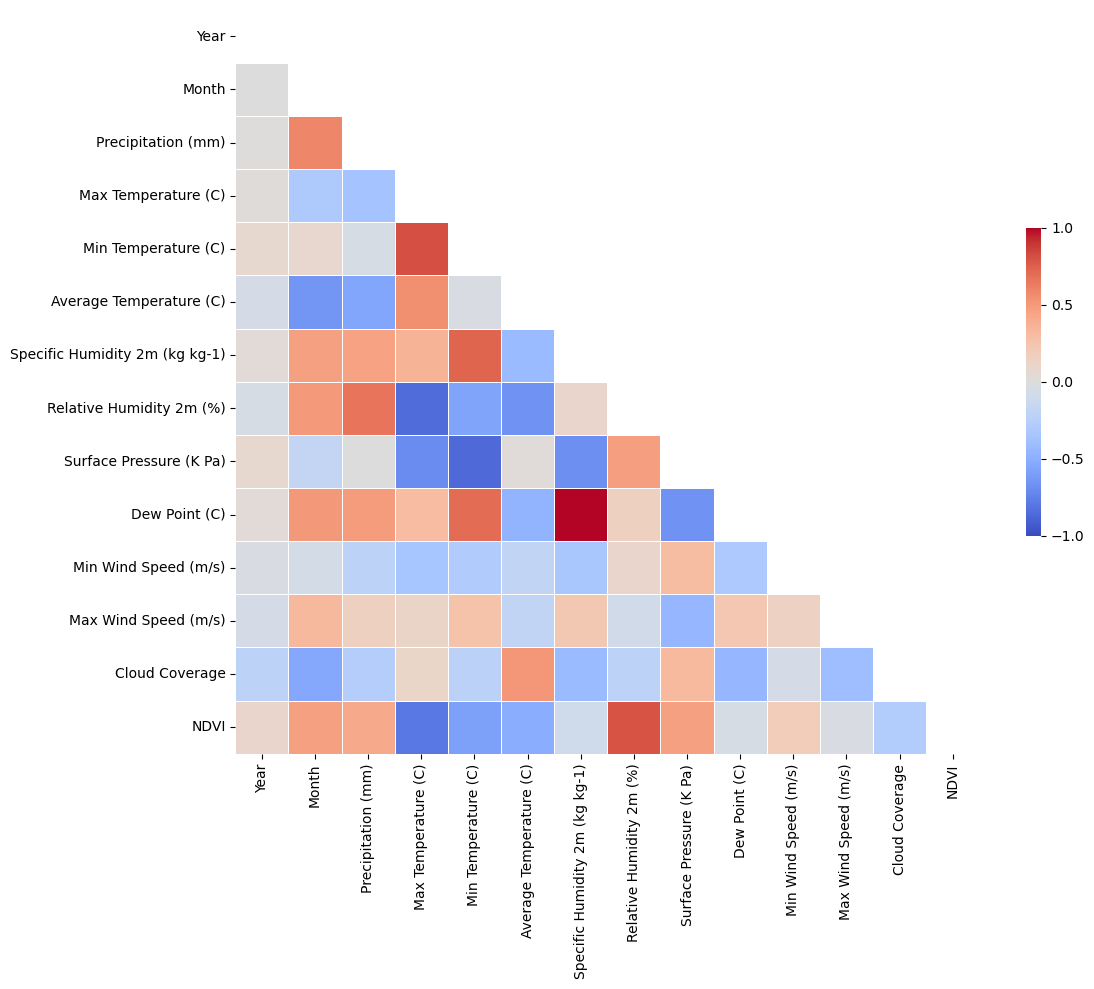

In [11]:
f, ax = plt.subplots(figsize=(12, 10)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [12]:
ndvi_data=ndvi_data.drop(['Year','Month'],axis=1)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ndvi_data)


In [14]:
X = []
y = []
for i in range(12, len(scaled_data)):
    X.append(scaled_data[i-12:i, :-1])  # Input data (12 months history)
    y.append(scaled_data[i, -1])   

In [15]:
X, y = np.array(X), np.array(y)

In [16]:
X.shape

(228, 12, 11)

In [17]:
X

array([[[0.        , 0.21527496, 0.11093514, ..., 0.25171782,
         0.39634418, 0.20588235],
        [0.04976592, 0.4937127 , 0.23281261, ..., 0.18712781,
         0.22505573, 0.41176471],
        [0.        , 0.68702555, 0.27190267, ..., 0.0742098 ,
         0.14881855, 0.61764706],
        ...,
        [0.33172037, 0.32809874, 0.24245915, ..., 0.03183692,
         0.10824788, 0.52941176],
        [0.33172037, 0.21417396, 0.28054136, ..., 0.41113147,
         0.56165849, 0.30882353],
        [0.17006963, 0.09700411, 0.11453459, ..., 0.36898763,
         0.59188587, 0.01470588]],

       [[0.04976592, 0.4937127 , 0.23281261, ..., 0.18712781,
         0.22505573, 0.41176471],
        [0.        , 0.68702555, 0.27190267, ..., 0.0742098 ,
         0.14881855, 0.61764706],
        [0.        , 1.        , 0.78734432, ..., 0.1069629 ,
         0.28996879, 0.44117647],
        ...,
        [0.33172037, 0.21417396, 0.28054136, ..., 0.41113147,
         0.56165849, 0.30882353],
        [0.1

In [18]:
y

array([0.63195984, 0.5095114 , 0.33002949, 0.36913293, 0.35522066,
       0.        , 0.42111141, 0.4783895 , 0.60148534, 0.72626682,
       0.76169777, 0.833828  , 0.75558664, 0.53783995, 0.39722752,
       0.31531565, 0.3252738 , 0.39601987, 0.36645705, 0.28799958,
       0.36698165, 0.41238693, 0.6228378 , 0.72816999, 0.64634854,
       0.35447393, 0.22234817, 0.19481696, 0.21017544, 0.27328804,
       0.42726987, 0.59004041, 0.5737248 , 0.73838184, 0.70946814,
       0.75380326, 0.65478161, 0.38368276, 0.2382759 , 0.17613498,
       0.54379918, 0.48946856, 0.52297342, 0.37162168, 0.60426157,
       0.3474832 , 0.8761347 , 0.87122116, 0.61326282, 0.45694428,
       0.34346149, 0.54930412, 0.48647107, 0.44236556, 0.4085901 ,
       0.37457867, 0.6232469 , 0.89359296, 0.89126593, 0.93394739,
       0.68482092, 0.52451391, 0.51111548, 0.42787541, 0.45211683,
       0.41977311, 0.36616035, 0.47114814, 0.59664579, 0.53645495,
       0.75092398, 0.85018197, 0.73388659, 0.5302862 , 0.37375

In [19]:
# Split the data into training and testing sets (90% training, 10% testing)
train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [20]:
# Reshape X_train and X_test for GRU, LSTM, and RNN input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

### GRU(Gated Recurrent Unit)

In [21]:
def create_gru_model(units=64):
    # model = Sequential()
    # model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(Dense(1))
    # model.compile(optimizer=Adam(), loss='mse')
    # return model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))  # Adding a dropout layer
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dropout(0.2))  # Another dropout layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [22]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=1)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_39372\3748809474.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=1)


In [23]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [24]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [25]:
gru_grid_result = gru_grid.fit(X_train, y_train)

Epoch 1/50
9/9 [==============================] - 6s 21ms/step - loss: 0.0872
Epoch 2/50
9/9 [==============================] - 0s 29ms/step - loss: 0.0328
Epoch 3/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0236
Epoch 4/50
9/9 [==============================] - 0s 33ms/step - loss: 0.0229
Epoch 5/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0192
Epoch 6/50
9/9 [==============================] - 0s 38ms/step - loss: 0.0202
Epoch 7/50
9/9 [==============================] - 0s 33ms/step - loss: 0.0146
Epoch 8/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0170
Epoch 9/50
9/9 [==============================] - 0s 33ms/step - loss: 0.0159
Epoch 10/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0136
Epoch 11/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0178
Epoch 12/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0138
Epoch 13/50
9/9 [==============================] - 0s 31ms/st

In [26]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 32, 'epochs': 100, 'units': 64}
Best GRU score: -0.011196529108455942


### LSTM(Long Short Term Memory)

In [27]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [28]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_39372\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [29]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [30]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [31]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [32]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 32, 'epochs': 100, 'units': 128}
Best LSTM score: -0.009780558067998735


### RNN (Recurrent Neural Network)

In [33]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [34]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_39372\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [35]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [36]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [37]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [38]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 32, 'epochs': 50, 'units': 32}
Best SimpleRNN score: -0.013464896753127092


In [39]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


1/1 [==============================] - 1s 1s/step
GRU Model - MSE: 0.020454167985632453
LSTM Model - MSE: 0.02367167513028724
SimpleRNN Model - MSE: 0.020131466762857503


## RNN is sutaible for NDVI with MSE of 0.022

In [86]:
Phase1_output2=pd.read_excel("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\Phase1_Output.xlsx")


In [87]:
Phase1_output2

,Year,Month,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage
0,2020,1,0.000000,30.776250,19.748750,11.026875,15.673125,78.653125,100.465000,21.029375,0.789375,7.151875,0.67875
1,2020,2,0.000000,32.660000,21.286250,11.372500,14.815000,70.162500,100.491875,20.102500,1.579375,8.536250,0.68125
2,2020,3,0.000000,35.455000,23.530625,11.921875,15.445000,65.330000,100.272500,20.640000,0.615625,7.084375,0.67875
3,2020,4,0.000000,36.769375,24.823750,11.945000,17.586250,66.550000,100.161250,22.721875,0.651250,7.388750,0.69000
4,2020,5,0.000000,38.546250,26.879375,11.666250,18.248125,63.644375,99.804375,23.292500,0.273125,10.018750,0.66125
5,2020,6,0.197500,36.623125,25.808125,10.816875,17.475000,65.722500,99.721875,22.620625,0.288750,9.447500,0.66375
6,2020,7,5.270000,34.145625,25.036875,9.110000,18.133750,74.365625,99.753750,23.330000,0.302500,8.953750,0.66375
7,2020,8,3.030625,34.403125,24.659375,9.743125,18.366875,74.887500,99.776250,23.545000,0.372500,10.689375,0.65375
8,2020,9,5.336250,33.391875,24.107500,9.284375,18.158125,77.657500,99.833125,23.370000,0.564375,10.001250,0.66250
9,2020,10,4.479375,33.220625,23.686875,9.532500,18.178750,78.869375,99.868750,23.411250,0.190000,8.945625,0.62750


In [88]:
Phase1_output_pred=[]

In [89]:
Phase1_output2=Phase1_output2.drop(['Year','Month'],axis=1)

In [90]:
features = ndvi_data.drop(['NDVI'], axis=1)
target =ndvi_data[['NDVI']]

In [91]:

# Scale features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit(features)
scaledtest_data = scaled_features.transform(Phase1_output2)
scaled_target = target_scaler.fit(target)

In [92]:
scaledtest_data

array([[0.        , 0.22976184, 0.16816644, 0.48165078, 0.4256379 ,
        0.6468194 , 0.87254902, 0.48947058, 0.25125973, 0.10022292,
        0.66176471],
       [0.        , 0.4044156 , 0.34525952, 0.51776153, 0.28606282,
        0.3157202 , 0.90065359, 0.34353474, 0.54076958, 0.29772626,
        0.69117647],
       [0.        , 0.66355682, 0.60377223, 0.57515998, 0.38853309,
        0.12727273, 0.67124183, 0.42816375, 0.18758589, 0.09059296,
        0.66176471],
       [0.        , 0.78542041, 0.75271759, 0.57757607, 0.73681   ,
        0.17484767, 0.55490196, 0.75595355, 0.20064132, 0.13401694,
        0.79411765],
       [0.        , 0.95016515, 0.9894896 , 0.5484524 , 0.84446478,
        0.06154034, 0.18169935, 0.84579807, 0.06207055, 0.50922871,
        0.45588235],
       [0.01243165, 0.77186069, 0.86610035, 0.45971007, 0.71871506,
        0.1425786 , 0.09542484, 0.74001181, 0.06779661, 0.42773072,
        0.48529412],
       [0.33172037, 0.54215681, 0.77726586, 0.28137652, 0.

In [93]:
X_test = []
for i in range(0, len(scaledtest_data)):
    X_test.append(scaledtest_data[i:i+1, :])  # 12 months history

In [94]:
X_test 

[array([[0.        , 0.22976184, 0.16816644, 0.48165078, 0.4256379 ,
         0.6468194 , 0.87254902, 0.48947058, 0.25125973, 0.10022292,
         0.66176471]]),
 array([[0.        , 0.4044156 , 0.34525952, 0.51776153, 0.28606282,
         0.3157202 , 0.90065359, 0.34353474, 0.54076958, 0.29772626,
         0.69117647]]),
 array([[0.        , 0.66355682, 0.60377223, 0.57515998, 0.38853309,
         0.12727273, 0.67124183, 0.42816375, 0.18758589, 0.09059296,
         0.66176471]]),
 array([[0.        , 0.78542041, 0.75271759, 0.57757607, 0.73681   ,
         0.17484767, 0.55490196, 0.75595355, 0.20064132, 0.13401694,
         0.79411765]]),
 array([[0.        , 0.95016515, 0.9894896 , 0.5484524 , 0.84446478,
         0.06154034, 0.18169935, 0.84579807, 0.06207055, 0.50922871,
         0.45588235]]),
 array([[0.01243165, 0.77186069, 0.86610035, 0.45971007, 0.71871506,
         0.1425786 , 0.09542484, 0.74001181, 0.06779661, 0.42773072,
         0.48529412]]),
 array([[0.33172037, 0.54215

In [95]:
X_test = np.array(X_test)

In [96]:
X_test 

array([[[0.        , 0.22976184, 0.16816644, 0.48165078, 0.4256379 ,
         0.6468194 , 0.87254902, 0.48947058, 0.25125973, 0.10022292,
         0.66176471]],

       [[0.        , 0.4044156 , 0.34525952, 0.51776153, 0.28606282,
         0.3157202 , 0.90065359, 0.34353474, 0.54076958, 0.29772626,
         0.69117647]],

       [[0.        , 0.66355682, 0.60377223, 0.57515998, 0.38853309,
         0.12727273, 0.67124183, 0.42816375, 0.18758589, 0.09059296,
         0.66176471]],

       [[0.        , 0.78542041, 0.75271759, 0.57757607, 0.73681   ,
         0.17484767, 0.55490196, 0.75595355, 0.20064132, 0.13401694,
         0.79411765]],

       [[0.        , 0.95016515, 0.9894896 , 0.5484524 , 0.84446478,
         0.06154034, 0.18169935, 0.84579807, 0.06207055, 0.50922871,
         0.45588235]],

       [[0.01243165, 0.77186069, 0.86610035, 0.45971007, 0.71871506,
         0.1425786 , 0.09542484, 0.74001181, 0.06779661, 0.42773072,
         0.48529412]],

       [[0.33172037, 0.54215

In [97]:
print("Shape of X_test before reshaping:", X_test.shape)

Shape of X_test before reshaping: (12, 1, 11)


In [98]:
# Reshape X_test for prediction
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [99]:
best_model = gru_grid_result.best_estimator_

Phase1_output_pred=best_model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [100]:
Phase1_output_pred

array([0.26532552, 0.20316857, 0.19578364, 0.22724438, 0.22682205,
       0.22405893, 0.32046402, 0.31173852, 0.33732703, 0.35842168,
       0.4103907 , 0.3875032 ], dtype=float32)

In [101]:
y_pred_original=[]

In [102]:
y_pred_original = target_scaler.inverse_transform(Phase1_output_pred.reshape(-1, 1))


In [1]:
#Predicting for 2020
ndvi=pd.DataFrame(data=y_pred_original)
ndvi

,0
0,0.578393
1,0.454756
2,0.451948
3,0.463912
4,0.463751
5,0.462730
6,0.549361
7,0.576043
8,0.505773
9,0.613795


In [104]:
#Exporting the predictions of 2020 into csv file
ndvi.to_csv(r"C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\ndvi1.csv")
